##### Copyright 2021 The Cirq Developers

In [1]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook relies on unreleased Cirq features. If you want to try these features, make sure you install cirq via `pip install cirq --pre`.

# Heatmaps

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://quantumai.google/cirq/tutorials/heatmaps>"><img src="https://quantumai.google/site-assets/images/buttons/quantumai_logo_1x.png" />View on QuantumAI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/quantumlib/Cirq/blob/master/docs/tutorials/heatmaps.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/colab_logo_1x.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/quantumlib/Cirq/blob/master/docs/tutorials/heatmaps.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/github_logo_1x.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/Cirq/docs/tutorials/heatmaps.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/download_icon_1x.png" />Download notebook</a>
  </td>
</table>

Qubit heatmaps are primarily used for [visualizing calibration metrics](./google/visualizing_calibration_metrics.ipynb) but can be used for any custom data. This tutorial shows how to create a `cirq.Heatmap` for single-qubit data and a `cirq.TwoQubitInteractionHeatmap` for two-qubit data.

In [2]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet --pre cirq
    print("installed cirq.")
    import cirq

import matplotlib.pyplot as plt

# Basic usage
Heatmaps maintain an internal state of configuration parameters based on the `kwargs` passed to the constructor, for example: `plot_colorbar=False` to hide the colorbar. For full details on the valid set of parameters, please see the `cirq.Heatmap` reference page.

The internal state can alse be updated after construction by passing a valid set of `kwargs` to `heatmap.update_config(**kwargs)`.

## Single-qubit heatmaps

You can directly create heatmaps using custom data mapping from a grid qubit tuple (single qubit or qubit pair) to a corresponding float value. 

A single-qubit heatmap example is shown below.

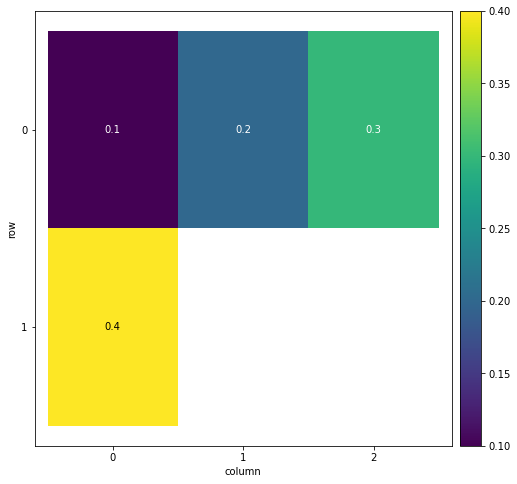

In [3]:
single_qubit_heatmap = cirq.Heatmap({
    (cirq.GridQubit(0, 0),): 0.1,
    (cirq.GridQubit(0, 1),): 0.2,
    (cirq.GridQubit(0, 2),): 0.3,
    (cirq.GridQubit(1, 0),): 0.4,
})

_, ax = plt.subplots(figsize=(8, 8))
_ = single_qubit_heatmap.plot(ax);

## Two-qubit heatmaps

Two-qubit heatmaps can be made in an analogous manner using tuples of qubit pairs and corresponding (float) data values.

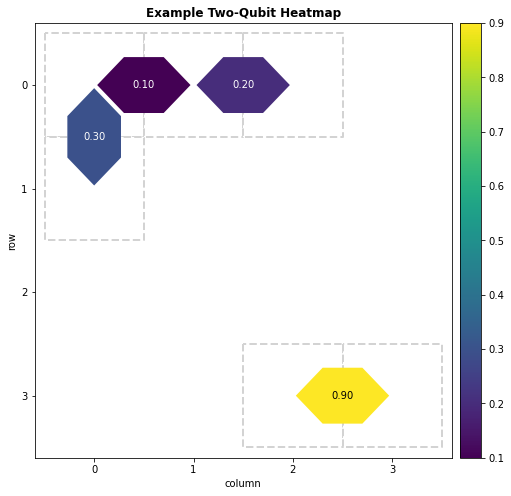

In [4]:
two_qubit_interaction_heatmap = cirq.TwoQubitInteractionHeatmap({
    (cirq.GridQubit(0, 0), cirq.GridQubit(0, 1)): 0.1,
    (cirq.GridQubit(0, 1), cirq.GridQubit(0, 2)): 0.2,
    (cirq.GridQubit(1, 0), cirq.GridQubit(0, 0)): 0.3,
    (cirq.GridQubit(3, 3), cirq.GridQubit(3, 2)): 0.9,
}, annotation_format="0.2f", title = 'Example Two-Qubit Heatmap')

_, ax = plt.subplots(figsize=(8, 8))
_ = two_qubit_interaction_heatmap.plot(ax)

These types of plots are used for [visualizing two-qubit calibration metrics](./google/visualizing_calibration_metrics.ipynb).

# Heatmap configurations
Once can also pass a valid set of config parameters to the `heatmap.plot(ax, **kwargs)` function, which would temporarily update the internal config based on the parameter values passed as `kwargs`.

Below, we show some examples of useful config parameters for the heatmaps.

## Colorbar Properties

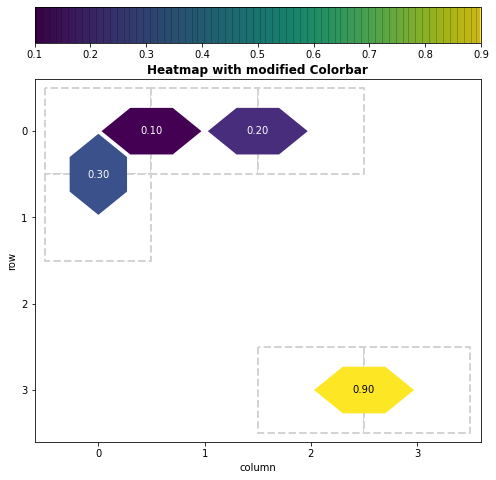

In [5]:
_, ax = plt.subplots(figsize=(8, 8))
_ = two_qubit_interaction_heatmap.plot(ax,
                                       title = 'Heatmap with modified Colorbar',
                                       plot_colorbar = True,
                                       colorbar_position = 'top',
                                       colorbar_size = '10%',
                                       colorbar_pad = '10%',
                                       colorbar_options = {
                                           'drawedges' : True
                                       })

## Colormap properties

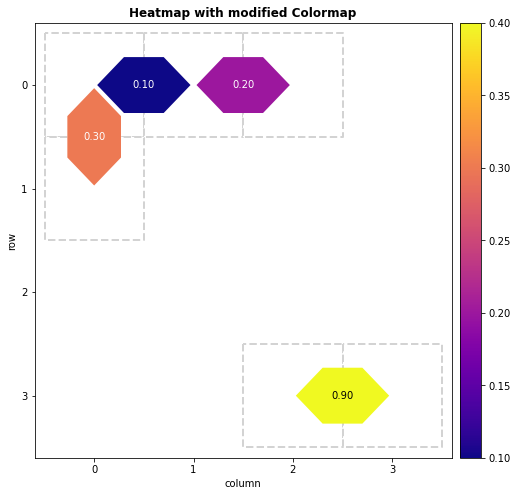

In [6]:
_, ax = plt.subplots(figsize=(8, 8))
_ = two_qubit_interaction_heatmap.plot(ax,
                                       title = 'Heatmap with modified Colormap',
                                       vmin = 0.1,
                                       vmax = 0.4,
                                       collection_options = {
                                           'cmap' : 'plasma'
                                       })

## Annotation text properties

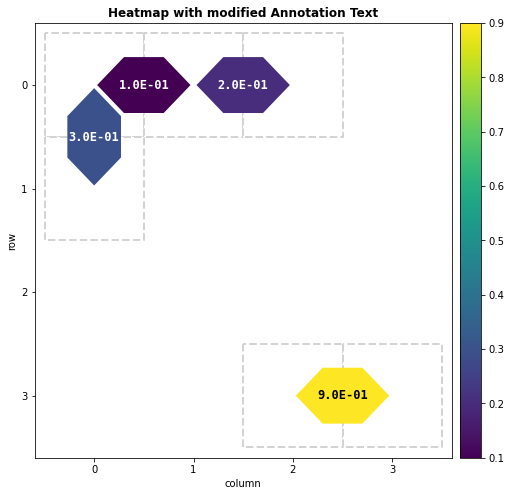

In [7]:
_, ax = plt.subplots(figsize=(8, 8))
_ = two_qubit_interaction_heatmap.plot(ax,
                                       title = 'Heatmap with modified Annotation Text',
                                       annotation_format = '.1E',
                                       annotation_text_kwargs = {
                                           'family' : 'monospace',
                                           'size' : 'large',
                                           'weight' : 'bold'
                                       })

## PolyCollection properties
The properties of the polygons representing the single qubit vertices / two-qubit interaction edges can be modified by passing keyword arguments to `collection_options`, which will get forwarded as `**kwargs` to `matplotlib.collections.PolyCollection`.

For example: A color or a list of colors (corresponding to each polygon) can be passed to `edgecolors` to modify the edge colors of the polygons.

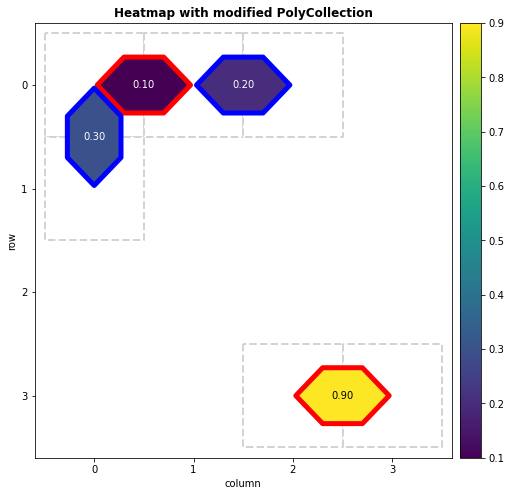

In [8]:
_, ax = plt.subplots(figsize=(8, 8))
_ = two_qubit_interaction_heatmap.plot(ax,
                                       title = 'Heatmap with modified PolyCollection',
                                       collection_options = {
                                           'edgecolors' : ('red', 'blue', 'blue', 'red'),
                                           'linewidths' : 5,
                                       })
